In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt

In [78]:
start_time=time.time()
num_of_city = 20

In [79]:
# using the GIVEN DISTANCE
cities_Location= pd.read_csv("D:\\table27.csv")
cities_Location = np.array(cities_Location)  # generate the initial cities locations
print(cities_Location)  # print out the distance matrix

[[  0  25  43  57  43  55  48  35  18  28  55  61  22  78  49  15  36  46
   25  23]
 [ 25   0  29  34  43  68  49  66  72  91  65  44  25  85  95  75  36  44
   12  28]
 [ 43  29   0  52  72  96  72  81  89 114  22  74  45  69  85  12   3  45
   74  69]
 [ 57  34  52   0  45  71  71  95  99 108  14  36  96  45  78  21  23  45
   65  78]
 [ 43  43  72  45   0  27  36  65  65  65  56  78  23  45  96  12  11  36
   23  85]
 [ 55  68  96  71  27   0  40  66  62  46  88  98  71  23  45  65  22   1
    9  77]
 [ 48  49  72  71  36  40   0  31  31  43  27  39  48  56  47  89  25  34
   98  99]
 [ 35  66  81  95  65  66  31   0  11  46  88  22  99  33  66  55  44  11
   22  44]
 [ 18  72  89  99  65  62  31  11   0  36  89  77  54  32  12  96  54  78
   25  36]
 [ 28  91 114 108  65  46  43  46  36   0  77  65  45  28  19   7  34  16
    1  89]
 [ 55  65  22  14  56  88  27  88  89  77   0   4  88  32  45  67  82  19
   44  16]
 [ 61  44  74  36  78  98  39  22  77  65   4   0   4   7   3  19

In [80]:
# For the Simulated Annealing part

def initial_sol():  # generate a random initial solution
    movement_candi = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20]  # made a list prepare to random choice
    random_list = random.sample(movement_candi, 19)  # made these city sequence random
    random_list.insert(0,1)  # add the first city
    random_list.insert(num_of_city, 1)  # add the final trip to go back to city 01
    return random_list


In [81]:
# Mechanism Permutation Neighborhood by Inversion / Transposition / Displacement
def select_neighborhood(the_path):
    k = random.random()  # generate a number to choice what mechanism of select neighborhood this time
    if k > 0.66:  # one-third opportunity to do Inversion
        rand_Loc = random.randint(2, 19)  # choice a location
        temp_num = the_path[rand_Loc]  # chosen location's value
        the_path[rand_Loc] = the_path[rand_Loc - 1]  # transfer the value to previous one
        the_path[rand_Loc - 1] = temp_num  # also give the value to exchange one
    elif 0.66 > k > 0.33:  # one-third opportunity to do Transposition
        rand_Loc01, rand_Loc02 = random.randint(1, 19), random.randint(1, 19)  # choice 2 locations
        if rand_Loc01 != rand_Loc02:  # if that 2 location different
            temp_num = the_path[rand_Loc01]
            the_path[rand_Loc01] = the_path[rand_Loc02]  # make them change each other
            the_path[rand_Loc02] = temp_num
        else:  # if the first outcome are the same
            temp_list = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19]  # once they are the same number
            temp_list.pop(rand_Loc02 - 2)  # re-choice a location again
            rand_Loc01 = random.choice(temp_list)
            temp_num = the_path[rand_Loc01]
            the_path[rand_Loc01] = the_path[rand_Loc02]  # make them change each other
            the_path[rand_Loc02] = temp_num
    else:  # one-third opportunity to do Displacement
        rand_Loc01, rand_Loc02 = random.randint(1, 19), random.randint(1, 19)  # chose two location
        temp_num = the_path[rand_Loc01]
        the_path.pop(rand_Loc01)  # make the chosen one insert into another location
        the_path.insert(rand_Loc02, temp_num)
    return the_path  # return a new path

In [82]:
def find_distance(someone_path):  # this function make the path could got its distance
    distance = 0
    for city in range(0, num_of_city):  # city by city to find out its distance
        distance += cities_Location[someone_path[city] - 1][someone_path[city + 1] - 1]
    return distance

In [83]:
def delta(compute_distance_maybe_update, compute_distance_current):  # compute the delta value for two distance
    the_delta = compute_distance_maybe_update - compute_distance_current
    return the_delta

In [84]:
def accept_worse_moves(compute_delta_value, compute_temperature_current, compute_path_maybe_update,
                       compute_distance_maybe_update, compute_curr_path, compute_curr_dis):
    r = random.random()  # if it is a worse move, also make a chance let it accepted
    move_prob = math.exp(- compute_delta_value / compute_temperature_current)  # move prob formula
    if r > move_prob:  # accepted this worse move
        compute_path_current = compute_path_maybe_update
        compute_distance_current = compute_distance_maybe_update
    else:  # do not accepted this worse
        compute_path_current = compute_curr_path
        compute_distance_current = compute_curr_dis
    return compute_path_current, compute_distance_current


In [85]:
# Parameter Setting
initTemp = 500  # set the starting temperature as 500
finalTemp = 1  # set the final temperature as 1
rate_of_cooling = 0.001  # the rate of cooling
a_of_LinearlyIncreasing = 2
b_of_LinearlyIncreasing = 15
b_of_Reheating = 0.2
r_of_Reheating = 0.1

initPath = initial_sol()  # realize the initial Path
initDis = find_distance(initPath)
# print('Initial Path is: ', path_current, " , and their distance is: ", distance_current)
total_Iteration = 0  # set the initial iteration
shortestDis = 500
shortestPath = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,1]
currPath = initPath
currDis = initDis
currTemp, candidateTemp = initTemp, initTemp
shortest_DisList = []
# structure
while currTemp > finalTemp:
    # Number of Iterations using the Linearly increasing
    limitIterations_inTemp = a_of_LinearlyIncreasing * (currTemp - candidateTemp) + b_of_LinearlyIncreasing
    limitIterations_inTemp = int(limitIterations_inTemp)
    iterations = 0
    currTemp = candidateTemp
    while iterations < limitIterations_inTemp:
        candidatePath = select_neighborhood(currPath)
        candidateDis = find_distance(candidatePath)
        delta_value = delta(candidateDis, currDis)
        if delta_value < 0:
            if currDis < shortestDis:  # to record for the  __ history
                shortestDis = currDis
                shortestPath = currPath
                print('the current shortest path: ', shortestPath, 'the current shortest distance: ',
                      shortestDis, ' and this is ', total_Iteration, ' iterations')
            else:
                currDis, currPath = currDis, currPath
            currPath = candidatePath
            currDis = candidateDis
            # cooling schedule using the model by Lundy and Mees(1986)
            candidateTemp = currTemp / (1 + (rate_of_cooling * currTemp))
            # Reheating when move is accepted
            candidateTemp = candidateTemp / (1 + b_of_Reheating)


        # this part write the condition of  "may accept worse moves"
        else:
            if currDis < shortestDis:  # to record for the  __ history
                shortestDis = currDis
                shortestPath = currPath
                print('the current shortest path: ', shortestPath, 'the current shortest distance: ',
                      shortestDis, ' and this is ', total_Iteration, ' iterations')

            else:
                currDis, currPath = currDis, currPath

            currPath, currDis = accept_worse_moves(delta_value, currTemp, candidatePath,
                                                   candidateDis, currPath, currDis)
            # cooling schedule using the model by Lundy and Mees(1986)
            candidateTemp = currTemp / (1 + (rate_of_cooling * currTemp))
            # Reheating when move is rejected
            candidateTemp = candidateTemp / (1 - r_of_Reheating)

        iterations += 1
        total_Iteration += 1
        shortest_DisList.append(shortestDis)

        #print('current path: ', currPath, ', and their distance: ', currDis)

print('Currently total iterations: ', total_Iteration)
print('-----------------------------------------------------------')

print("Shortest distance(y): ", shortestDis)

Currently total iterations:  2839
-----------------------------------------------------------
Shortest distance(y):  500


Shortest distance(y):  500
Optima PATH: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1]


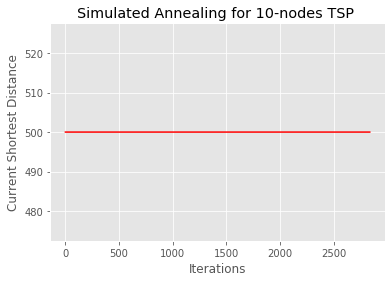

Total time is: 2.2793285846710205 s


In [86]:
print("Shortest distance(y): ", shortestDis)
print("Optima PATH:", shortestPath)
shortest_distance = pd.DataFrame(shortest_DisList)
plt.style.use('ggplot')
plt.plot(range(total_Iteration), shortest_distance, 'r')
plt.xlabel("Iterations")
plt.ylabel("Current Shortest Distance")
plt.title("Simulated Annealing for 10-nodes TSP ")
# plt.figure()
plt.show()
exec_time=time.time()-start_time
print("Total time is:",exec_time,'s')

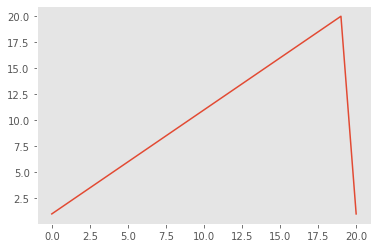

In [87]:
plt.plot(shortestPath)
plt.grid()
plt.show()